## Introduction

This notebook is focused on analyzing credit card policy data. Through various exploratory data analysis techniques, we aim to gain insights and understand the underlying patterns within the data.

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns

## Library Imports

The following libraries are essential for data manipulation, visualization, and analysis:
- **numpy**: For numerical operations.
- **pandas**: For data manipulation and analysis.
- **matplotlib**: For data visualization.
- **seaborn**: For advanced data visualization based on matplotlib.

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.22.4
1.4.4
0.12.2


## Data Loading

The data is loaded from an Excel file named 'godigt_cc_data (3).xlsx'. This dataset presumably contains information related to credit card policies, which we'll explore in the subsequent sections.

In [3]:
from google.colab import files
data_to_load = files.upload()

Saving godigt_cc_data (3).xlsx to godigt_cc_data (3).xlsx


## Data Inspection

By inspecting the initial rows of our dataset, we can get a preliminary understanding of the dataset's structure, columns, and the type of information it contains.

In [5]:
credit = pd.read_excel('godigt_cc_data (3).xlsx')

In [7]:
credit.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [6]:
credit.info

<bound method DataFrame.info of       userid              card_no  card_bin_no Issuer   card_type  \
0          1  4384 39XX XXXX XXXX       438439   Visa        edge   
1          2  4377 48XX XXXX XXXX       437748   Visa  prosperity   
2          3  4377 48XX XXXX XXXX       437748   Visa     rewards   
3          4  4258 06XX XXXX XXXX       425806   Visa   indianoil   
4          5  4377 48XX XXXX XXXX       437748   Visa        edge   
...      ...                  ...          ...    ...         ...   
8443    8444  4262 41XX XXXX XXXX       426241   Visa   chartered   
8444    8445    37691 6XXXX XXXXX       376916   Amex   centurion   
8445    8446  4375 51XX XXXX XXXX       437551   Visa     rewards   
8446    8447  4477 47XX XXXX XXXX       447747   Visa   indianoil   
8447    8448  4262 41XX XXXX XXXX       426241   Visa     rewards   

     card_source_date high_networth  active_30  active_60  active_90  ...  \
0          2019-09-29             B          0          1     

In [8]:
for i in credit.columns:
    print(i,credit[i].isnull().sum())

userid 0
card_no 0
card_bin_no 0
Issuer 0
card_type 0
card_source_date 0
high_networth 0
active_30 0
active_60 0
active_90 0
cc_active30 0
cc_active60 0
cc_active90 0
hotlist_flag 0
widget_products 0
engagement_products 0
annual_income_at_source 0
other_bank_cc_holding 0
bank_vintage 0
T+1_month_activity 0
T+2_month_activity 0
T+3_month_activity 0
T+6_month_activity 0
T+12_month_activity 0
Transactor_revolver 38
avg_spends_l3m 0
Occupation_at_source 0
cc_limit 0


In [9]:
credit.describe(include='all').T

<ipython-input-9-42c70f5b743e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  credit.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
userid,8448.0,NaN,NaN,NaN,NaT,NaT,4224.5,2438.87187,1.0,2112.75,4224.5,6336.25,8448.0
card_no,8448,11,4262 41XX XXXX XXXX,2084,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_bin_no,8448.0,NaN,NaN,NaN,NaT,NaT,436747.044508,30489.752417,376916.0,426241.0,437551.0,438439.0,524178.0
Issuer,8448,3,Visa,7279,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_type,8448,15,rewards,1502,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_source_date,8448,5186,2008-12-04 00:00:00,6,1998-07-24,2020-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
high_networth,8448,5,A,1740,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_30,8448.0,NaN,NaN,NaN,NaT,NaT,0.292377,0.454881,0.0,0.0,0.0,1.0,1.0
active_60,8448.0,NaN,NaN,NaN,NaT,NaT,0.494792,0.500002,0.0,0.0,0.0,1.0,1.0
active_90,8448.0,NaN,NaN,NaN,NaT,NaT,0.642045,0.479427,0.0,0.0,1.0,1.0,1.0


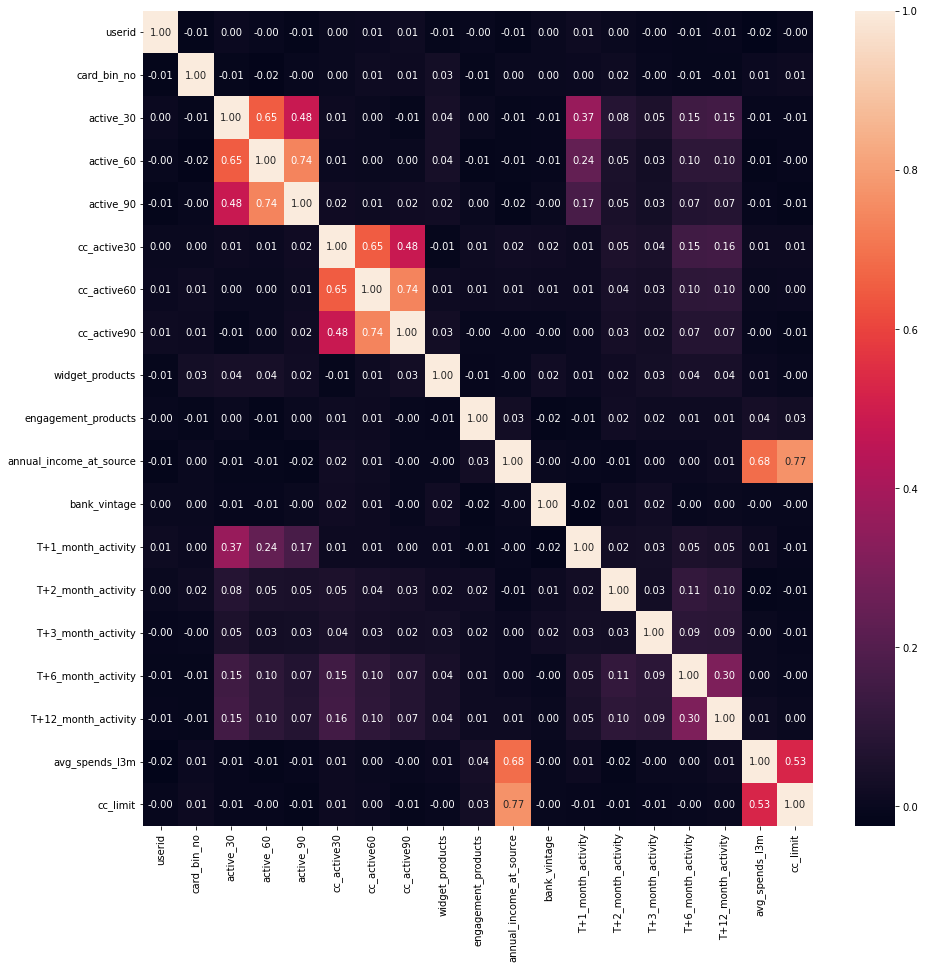

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(credit.corr(),annot=True,fmt=".2f");

<Axes: xlabel='Occupation_at_source', ylabel='count'>

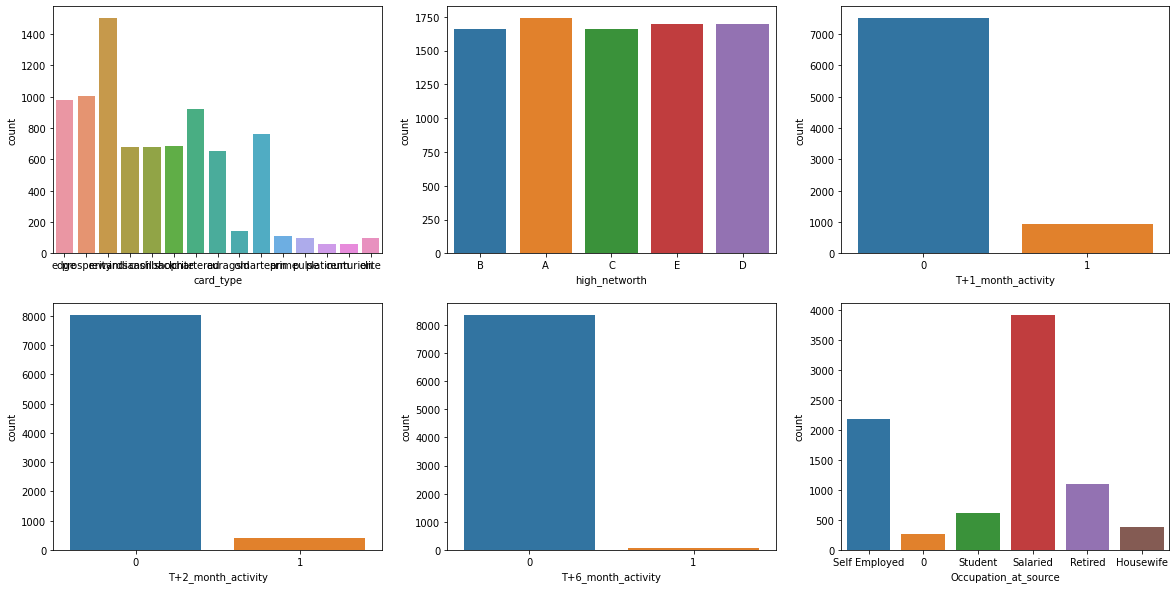

In [10]:
fig_dims = (20, 10) 
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims) 
sns.countplot(x="card_type", data=credit, ax=axs[0][0])
sns.countplot(x="high_networth", data=credit, ax=axs[0][1])
sns.countplot(x="T+1_month_activity", data=credit, ax=axs[0][2])
sns.countplot(x="T+2_month_activity", data=credit, ax=axs[1][0])
sns.countplot(x="T+6_month_activity", data=credit, ax=axs[1][1])
sns.countplot(x="Occupation_at_source", data=credit, ax=axs[1][2])

<Axes: xlabel='cc_limit', ylabel='count'>

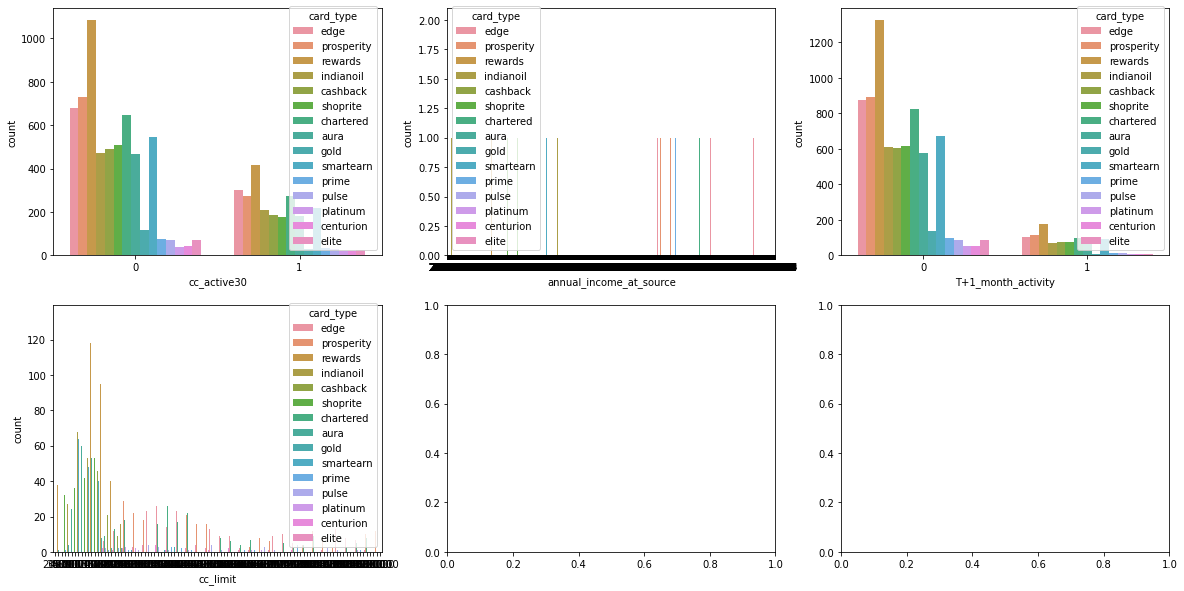

In [12]:
fig_dims = (20, 10) 
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims) 
sns.countplot(x="cc_active30", hue='card_type', data=credit, ax=axs[0][0])
sns.countplot(x="annual_income_at_source", hue='card_type', data=credit, ax=axs[0][1])
sns.countplot(x="T+1_month_activity", hue='card_type', data=credit, ax=axs[0][2])
sns.countplot(x="cc_limit", hue='card_type', data=credit, ax=axs[1][0])


In [13]:
sns.pairplot(credit)

Output hidden; open in https://colab.research.google.com to view.